## 1. Problem Framing
Predict a person's **salary** based on **years of experience**.
 
- Input (X): Years of Experience
- Output (Y): Salary
- Type: Supervised Learning (Regression)
 

In [1]:
import numpy as np
 
# Input data: Years of Experience
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
 
# Output data: Salary
y = np.array([25000, 30000, 35000, 45000, 50000])
 
X, y

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([25000, 30000, 35000, 45000, 50000]))

In [2]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
 
X_train, X_test

(array([[5],
        [3],
        [1],
        [4]]),
 array([[2]]))

In [3]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X_train, y_train)
 
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)
 

Slope (m): 6428.571428571427
Intercept (c): 17857.142857142862


In [ ]:
y_pred = model.predict(X_test)
y_pred

In [4]:
new_experience = np.array([[6]])
predicted_salary = model.predict(new_experience)
 
print("Predicted salary for 6 years experience:", predicted_salary[0])

Predicted salary for 6 years experience: 56428.57142857142


In [ ]:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

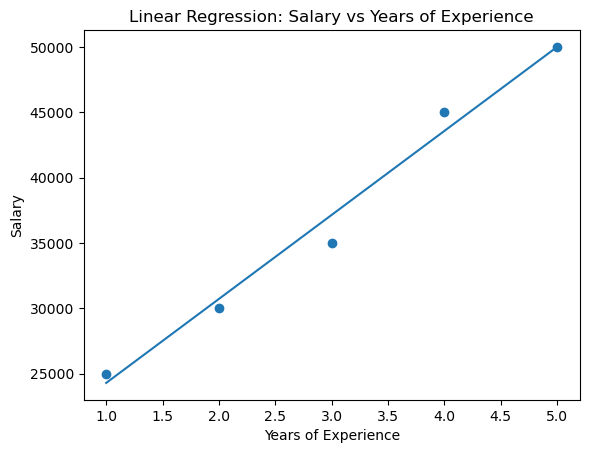

In [5]:
import matplotlib.pyplot as plt
import numpy as np
 
# Create smooth values for X-axis (for straight line)
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
 
# Predict salary for the line
y_line = model.predict(X_line)
 
# Plot actual data points
plt.figure()
plt.scatter(X, y)
 
# Plot regression line
plt.plot(X_line, y_line)
 
# Labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Years of Experience")
 
# Show plot
plt.show()


In [6]:
import pandas as pd
df=pd.read_csv("Salary_Data.csv")
print(df.describe())



       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [ ]:
# 1) Data Preprocessing - Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
 
%matplotlib inline
sns.set(style='whitegrid')
 
from google.colab import drive
 
# Mount your Drive
drive.mount('/content/drive')
 
# Once mounted, navigate to the folder
# Example path (adjust based on your structure)
path = '/content/drive/My Drive/Data Sets/50_Startups.csv'
 
dataset = pd.read_csv(path)
print('Dataset shape:', dataset.shape)
display(dataset.head())
 
# Separate features and target
X = dataset.iloc[:, :-1].values  # all columns except last (Profit)
y = dataset.iloc[:, -1].values   # last column (Profit)
 
print('\nFeature preview (first 5 rows):')
print(X[:5])
 
# Encode categorical 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
 
# Convert to numpy array and inspect
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])


In [ ]:
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))
 

In [ ]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

In [ ]:
# 4) Visualization - Code
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Profit (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

In [ ]:
# Evaluation metrics & sample prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')
 
# Sample prediction: build raw sample and encode using ct (same transformer used earlier)
raw_sample = np.array([[160000, 130000, 300000, 'California']])
encoded_sample = ct.transform(raw_sample)
encoded_sample = np.array(encoded_sample, dtype=float)
pred_sample = regressor.predict(encoded_sample)
print('\nSample startup predicted profit:', float(pred_sample[0]))



Linear Regression Performance
MAE : 4181.194473753651
R²  : 0.7835929767120722

Model Coefficients:
            Feature   Coefficient
4        smoker_yes  23651.128856
0               age   3614.975415
1               bmi   2036.228123
2          children    516.890247
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354

VIF Values:
            Feature       VIF
0               age  1.015843
1               bmi  1.088673
2          children  1.003348
3          sex_male  1.674830
4        smoker_yes  1.228075
5  region_northwest  1.223453
6  region_southeast  1.357419
7  region_southwest  1.215686


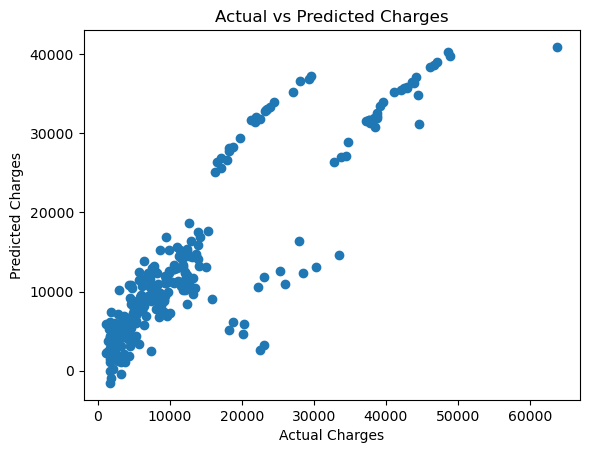


Predicted Charges for New Customer: 32189.88616839615


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv")
X = df.drop("charges", axis=1)
y = df["charges"]

numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Linear Regression Performance")
print("MAE :", mean_absolute_error(y_test, y_pred))

print("R²  :", r2_score(y_test, y_pred))

feature_names = (
    numeric_features +
    list(lr_model.named_steps["preprocessor"]
         .named_transformers_["cat"]
         .get_feature_names_out(categorical_features))
)

coefficients = lr_model.named_steps["regressor"].coef_

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

print("\nModel Coefficients:")
print(coef_df)

X_processed = preprocessor.fit_transform(X)
X_vif = pd.DataFrame(X_processed, columns=feature_names)

vif_data = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i)
            for i in range(X_vif.shape[1])]
})

print("\nVIF Values:")
print(vif_data)

ridge_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)



plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

new_customer = pd.DataFrame({
    "age": [40],
    "bmi": [30],
    "children": [2],
    "sex": ["male"],
    "smoker": ["yes"],
    "region": ["southeast"]
})

predicted_cost = ridge_model.predict(new_customer)
print("\nPredicted Charges for New Customer:", predicted_cost[0])
